# prepare work

## The tensor

In [5]:
#@save
import collections
import hashlib
import math
import os
import random
import re
import shutil
import sys
import tarfile
import time
import zipfile
from collections import defaultdict
import pandas as pd
import requests
from IPython import display
from matplotlib import pyplot as plt
from matplotlib_inline import backend_inline

d2l = sys.modules[__name__]

In [9]:
import torch
# create a tensor
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [10]:
x.shape # the tensor size
x.numel()  # tensor number

12

In [14]:
X = x.reshape(3, 4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [13]:
X = x.reshape(3, 4)  # need to stay the number of tensor
X

RuntimeError: shape '[2, 4]' is invalid for input of size 12

In [15]:
x.reshape(3,-1)   # auto change

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [16]:
torch.zeros((2, 3, 4))   # zeros or ones or randn, z,x,y

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [17]:
# basic compute
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y  

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [18]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [19]:
x

tensor([1., 2., 4., 8.])

In [21]:
# concatenate
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [22]:
torch.cat((X, Y), dim=0).shape

torch.Size([6, 4])

In [23]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [24]:
# it still is tensor
X.sum()

tensor(66.)

## broadcasting to change shape or number

In [25]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [26]:
a + b   # a will copy col, b will copy row

tensor([[0, 1],
        [1, 2],
        [2, 3]])

## index

In [27]:
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [28]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [29]:
X[0:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

## save the memory

In [31]:
before = id(Y)   # id for address
Y = Y + X
id(Y) == before

False

In [32]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 2278610987312
id(Z): 2278610987312


In [33]:
before = id(X)
X += Y
id(X) == before

True

In [34]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

## panda

In [37]:
import os

os.makedirs(os.path.join('.', 'data'), exist_ok=True)
data_file = os.path.join('.', 'data', 'house_tiny.csv')

In [38]:
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # 列名
    f.write('NA,Pave,127500\n')  # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [46]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [47]:
type(data)

pandas.core.frame.DataFrame

In [70]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs

,NumRooms,Alley
0,NaN,Pave
1,2.0,NaN
2,4.0,NaN
3,NaN,NaN


In [71]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]

In [72]:
inputs['NumRooms'].mean()

3.0

In [74]:
inputs.iloc[:,0] = inputs['NumRooms'].fillna(inputs['NumRooms'].mean())
inputs

,NumRooms,Alley
0,3.0,Pave
1,2.0,NaN
2,4.0,NaN
3,3.0,NaN


In [75]:
inputs = pd.get_dummies(inputs, dummy_na=True)  # one-hot
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0        True      False
1       2.0       False       True
2       4.0       False       True
3       3.0       False       True


In [76]:
import torch

X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(outputs.to_numpy(dtype=float))
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

In [79]:
import numpy as np
number = []
names = ['NumRooms','Alley','Price']
for name in names:
    a = np.sum(data[name].isnull())
    number.append(a)
data = data.drop(names[np.argmax(number)],axis = 1)    # to drop the col whitch have the most nan
data

,NumRooms,Price
0,NaN,127500
1,2.0,106000
2,4.0,178100
3,NaN,140000


In [80]:
np.argmax(number)

1

## linear algebra

In [81]:
# make a matrix
A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [83]:
X = torch.arange(24).reshape(2, 3, 4)   # channel, row, col
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [84]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()  
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [85]:
A * B   

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [86]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
X, a + X, (a * X).shape

(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]),
 tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

In [87]:
x = torch.arange(4, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [88]:
A, A.shape, A.sum()

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 torch.Size([5, 4]),
 tensor(190.))

In [90]:
A_sum_axis0 = A.sum(axis=1)
A_sum_axis0, A_sum_axis0.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [92]:
A.sum(axis=[0, 1]) == A.sum()

tensor(True)

In [93]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

In [94]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [95]:
A / sum_A   # auto broad

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [97]:
A, A.cumsum(axis=0), A.sum(axis=0)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  6.,  8., 10.],
         [12., 15., 18., 21.],
         [24., 28., 32., 36.],
         [40., 45., 50., 55.]]),
 tensor([40., 45., 50., 55.]))

In [98]:
y = torch.ones(4, dtype = torch.float32)
x, y, torch.dot(x, y)  # dot product

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [99]:
x * y

tensor([0., 1., 2., 3.])

In [100]:
torch.sum(x * y)  # just for the dot of vectors

tensor(6.)

In [101]:
A.shape, x.shape, torch.mv(A, x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

In [103]:
B = torch.ones(4, 3)
A,B,torch.mm(A, B)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[ 6.,  6.,  6.],
         [22., 22., 22.],
         [38., 38., 38.],
         [54., 54., 54.],
         [70., 70., 70.]]))

In [104]:
u = torch.tensor([3.0, -4.0])
torch.norm(u), torch.abs(u).sum()  # L2,L1

(tensor(5.), tensor(7.))

In [105]:
torch.ones((4, 9))

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [106]:
len(torch.ones((4, 9)))

4

In [109]:
A.sum(axis=0)

tensor([40., 45., 50., 55.])

In [115]:
B = torch.arange(24).reshape(2,3,4)
B,B.sum(axis=0),B.sum(axis=1),B.sum(axis=2)

(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]),
 tensor([[12, 14, 16, 18],
         [20, 22, 24, 26],
         [28, 30, 32, 34]]),
 tensor([[12, 15, 18, 21],
         [48, 51, 54, 57]]),
 tensor([[ 6, 22, 38],
         [54, 70, 86]]))

In [116]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l


def f(x):
    return 3 * x ** 2 - 4 * x

In [117]:
def use_svg_display():  #@save
    backend_inline.set_matplotlib_formats('svg')

In [118]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize   # d2l have from matplotlib import pyplot as plt

In [119]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [120]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

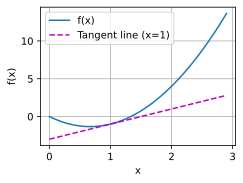

In [121]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

## automatic differentiation


In [127]:
import torch

x = torch.arange(4.0)
x    # the x is a vector like [x1,x2,x3,x4]

tensor([0., 1., 2., 3.])

In [128]:
x.requires_grad_(True)  # to save memory and creat x.grad
x.grad

In [129]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [131]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [132]:
x.grad == 4 * x

tensor([True, True, True, True])

In [134]:
# 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度。
# 本例只想求偏导数的和，所以传递一个1的梯度是合适的
x.grad.zero_()
x.grad

tensor([0., 0., 0., 0.])

In [135]:
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()   # y must be scalar 
x.grad

tensor([0., 2., 4., 6.])

In [137]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [140]:
u,x

(tensor([0., 1., 4., 9.]), tensor([0., 1., 2., 3.], requires_grad=True))

In [144]:
x.grad.zero_()
y = x * x
u = y
z = u * x

z.sum().backward()
x.grad

tensor([ 0.,  3., 12., 27.])

In [145]:
u

tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)

In [147]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [157]:
a = torch.randn(size=(), requires_grad=True)
print(a)
d = f(a)
d.backward()

tensor(2.6085, requires_grad=True)


In [158]:
a.grad == d / a   # the grad is line

tensor(True)

In [159]:
x

tensor([0., 1., 2., 3.], requires_grad=True)

In [160]:
d = f(x)
d

tensor([   0.,  512., 1024., 1536.], grad_fn=<MulBackward0>)

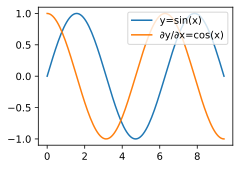

In [176]:
import torch
import matplotlib.pyplot as plt
import numpy as np
x = torch.linspace(0, 3*np.pi, 128)
x.requires_grad_(True)
y = torch.sin(x)  # y = sin(x)

y.sum().backward()

plt.plot(x.detach(), y.detach(), label='y=sin(x)') 
plt.plot(x.detach(), x.grad, label='∂y/∂x=cos(x)')  # dy/dx = cos(x)
plt.legend(loc='upper right')
plt.show()

In [177]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [178]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([1., 0., 0., 0., 0., 0.])

In [179]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([1., 2., 1., 2., 2., 2.])

In [180]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1610, 0.1590, 0.1730, 0.1580, 0.1590, 0.1900])

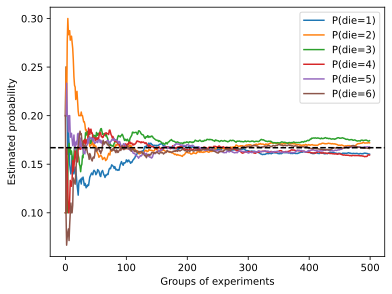

In [181]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();